
# Entrega 5 - DL


**Integrantes:**

+ Integrante 1: Neidan Martinez : neidan.martinez2201@ubiobio.cl
+ Integrante 2: Jean Muñoz : jean.munoz2201@ubiobio.cl
+ Integrante 3: Benjamin Escobar : Benjamin.escobar2201@ubiobio.cl


**Fecha de Creación: 01 Julio 2025

**Versión:** 1.0  

---

## Descripción


Este notebook contiene el desarrollo de la evaluación 5 de la asignatura de Inteligencia Artificial de la carrera de Ingeniería en Informática - Sede Concepción

---

Requisitos de Software
Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (1.26.4)
- matplotlib (3.7.1)
- tensorflow (2.17.1)

Para verificar la versión instalada ejecutar usando el nombre del paquete del cual quieres saber la versión; por ejemplo, si quieres saber la versión de numpy usas:

In [ ]:
import numpy
print(numpy.__version__)

2.0.2


In [ ]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from matplotlib import pyplot as plt
from time import time

In [ ]:
# Setea los seed para números random

np.random.seed(29)
tf.random.set_seed(29)

In [ ]:
# Carga datos de entrenamiento y prueba de CIFAR10

(imgs_train,labs_train), (imgs_test,labs_test) = keras.datasets.cifar10.load_data()
print(imgs_train.shape)
print(imgs_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
np.unique(labs_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# Lista de nombres para usar como etiquetas

nombres = ['avión', 'auto', 'pájaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camión']

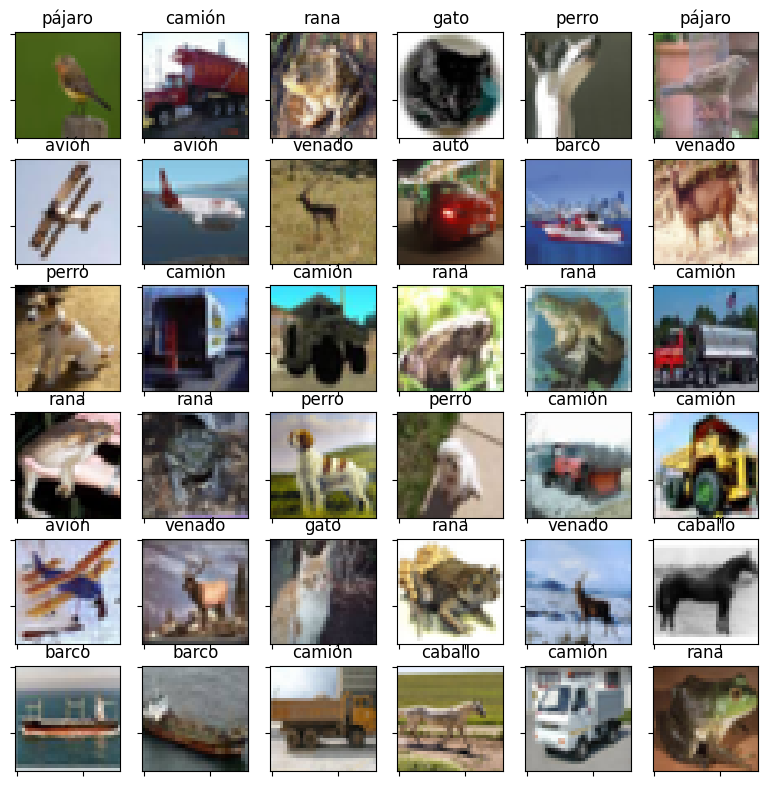

In [ ]:
# Muestra una grilla de ejemplos (al azar)

h = 6 # alto de la grilla
w = 6 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs_train))
    axs[i,j].set_title(nombres[labs_train[ex][0]])
    axs[i,j].grid(False)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].imshow(imgs_train[ex])

In [ ]:
# Tranforma los datos para el entrenamiento,
# Necesita transformar tanto el train como el test

X_train = imgs_train.reshape(50000,32*32*3)
X_test = imgs_test.reshape(10000,32*32*3)
# Normaliza
X_train = X_train / 255
X_test = X_test / 255

print('X', X_train.shape, X_test.shape)

Y_train = keras.utils.to_categorical(labs_train, 10)
Y_test = keras.utils.to_categorical(labs_test, 10)

print('Y', Y_train.shape, Y_test.shape)

X (50000, 3072) (10000, 3072)
Y (50000, 10) (10000, 10)


In [ ]:
# Cantidad de ejemplos, neuronas de entrada y neuronas de salida

M = X_train.shape[0]
N = X_train.shape[1]
C = Y_train.shape[1]

print(M,N,C)

50000 3072 10


In [ ]:
# Crea la red feed-forward (tiene 3 capas escondidas!)

h1 = 512
h2 = 256

red = keras.Sequential(name="Red_Evaluacion")
red.add(keras.layers.Input(shape=(N,), name='entrada'))
red.add(keras.layers.Dense(h1, activation='relu', name="Primera_capa"))
red.add(keras.layers.Dense(h2, activation='relu', name="Segunda_capa"))
red.add(keras.layers.Dense(h2, activation='relu', name="Tercera_capa"))
red.add(keras.layers.Dense(C, activation='softmax', name="Capa_salida"))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "Red_Evaluacion"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_salida (Dense)             │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = time()

# Entrena la red
num_epocas = 5
x_batch_size = 128
history = red.fit(X_train, Y_train,
                        epochs = num_epocas,
                        batch_size=x_batch_size,
                        validation_data=(X_test,Y_test))

end_time = time()
t = end_time - start_time
print(f"\nTiempo de entrenamiento: ({t / 60:.2f} minutos)")

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.2387 - loss: 2.1099 - val_accuracy: 0.3222 - val_loss: 1.8834
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.3498 - loss: 1.8388 - val_accuracy: 0.3656 - val_loss: 1.7818
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.3811 - loss: 1.7541 - val_accuracy: 0.3936 - val_loss: 1.7147
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.4005 - loss: 1.6970 - val_accuracy: 0.4077 - val_loss: 1.6726
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.4164 - loss: 1.6529 - val_accuracy: 0.4217 - val_loss: 1.6390

Tiempo de entrenamiento: (1.48 minutos)


# Evaluación

## Experimentación

### Agregar más capas o más neuronas

Nota. Uno de los experimentos DEBE obtener un accuracy superior al 90%

#### Experimento 1 - 1 punto

In [ ]:
# Crea la red feed-forward (tiene 3 capas escondidas!)

h1 = 512
h2 = 256
h3 = 128


red1 = keras.Sequential(name="Red_Evaluacion")
red1.add(keras.layers.Input(shape=(N,), name='entrada'))
red1.add(keras.layers.Dense(h1, activation='relu', name="Primera_capa"))
red1.add(keras.layers.Dense(h1, activation='relu', name="Segunda_capa"))
red1.add(keras.layers.Dense(h1, activation='relu', name="Tercera_capa"))
red1.add(keras.layers.Dense(h2, activation='relu', name="Cuarta_capa"))

red1.add(keras.layers.Dense(C, activation='softmax', name="Capa_salida"))

red1.summary()

red1.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "Red_Evaluacion"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Segunda_capa (Dense)            │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Tercera_capa (Dense)            │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Cuarta_capa (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_salida (Dense)             │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,232,586 (8.52 MB)

 Trainable params: 2,232,586 (8.52 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = time()

# Entrena la red
num_epocas = 15
x_batch_size = 32
history_1 = red1.fit(X_train, Y_train,
                        epochs = num_epocas,
                        batch_size=x_batch_size,
                        validation_data=(X_test,Y_test))

end_time = time()
t_experimento_1 = end_time - start_time
print(f"\nTiempo de entrenamiento: ({t_experimento_1 / 60:.2f} minutos)")

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.2758 - loss: 1.9897 - val_accuracy: 0.3962 - val_loss: 1.7005
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.3908 - loss: 1.6984 - val_accuracy: 0.4251 - val_loss: 1.6132
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.4320 - loss: 1.5962 - val_accuracy: 0.4474 - val_loss: 1.5505
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.4582 - loss: 1.5248 - val_accuracy: 0.4612 - val_loss: 1.5107
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.4779 - loss: 1.4683 - val_accuracy: 0.4733 - val_loss: 1.4801
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.4944 - loss: 1.4209 - val_accuracy: 0.4801 - val_loss: 1.4678
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.5089 - loss: 1.3796 - val_accuracy: 0.4886 - val_loss: 1.4374
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.5243 -

#### Experimento 2 - 1 punto

In [ ]:
# Crea la red feed-forward (tiene 3 capas escondidas!)

h1 = 1024
h2 = 512
h3 = 256
h4 = 128
h5 = 64


red2 = keras.Sequential(name="Red_Evaluacion")
red2.add(keras.layers.Input(shape=(N,), name='entrada'))
red2.add(keras.layers.Dense(h1, activation='relu', name="Primera_capa"))
red2.add(keras.layers.Dense(h2, activation='relu', name="Segunda_capa"))
red2.add(keras.layers.Dense(h3, activation='relu', name="Tercera_capa"))
red2.add(keras.layers.Dense(h4, activation='relu', name="Cuarta_capa"))
#red2.add(keras.layers.Dense(h5, activation='relu', name="Quinta_capa"))

red2.add(keras.layers.Dense(C, activation='softmax', name="Capa_salida"))

red2.summary()

red2.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "Red_Evaluacion"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Primera_capa (Dense)            │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Segunda_capa (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Tercera_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Cuarta_capa (Dense)             │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_salida (Dense)             │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,837,066 (14.64 MB)

 Trainable params: 3,837,066 (14.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = time()


# Entrena la red con más épocas y un batch_size más pequeño
num_epocas = 85
x_batch_size = 128
history_2 = red2.fit(X_train, Y_train,
                  epochs=num_epocas,
                  batch_size=x_batch_size,
                  validation_data=(X_test, Y_test))

end_time = time()
t_experimento_2 = end_time - start_time
print(f"\nTiempo de entrenamiento: ({t_experimento_2 / 60:.2f} minutos)")


Epoch 1/85
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 67ms/step - accuracy: 0.2395 - loss: 2.1043 - val_accuracy: 0.3057 - val_loss: 1.9087
Epoch 2/85
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - accuracy: 0.3523 - loss: 1.8308 - val_accuracy: 0.3477 - val_loss: 1.8008
Epoch 3/85
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.3853 - loss: 1.7374 - val_accuracy: 0.3740 - val_loss: 1.7438
Epoch 4/85
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.4079 - loss: 1.6746 - val_accuracy: 0.3867 - val_loss: 1.7034
Epoch 5/85
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 73ms/step - accuracy: 0.4254 - loss: 1.6263 - val_accuracy: 0.4032 - val_loss: 1.6658
Epoch 6/85
391/391 ━━━━━━━━━━━━━━━━━━━━ 46s 85ms/step - accuracy: 0.4384 - loss: 1.5865 - val_accuracy: 0.4126 - val_loss: 1.6413
Epoch 7/85
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 67ms/step - accuracy: 0.4528 - loss: 1.5526 - val_accuracy: 0.4244 - val_loss: 1.6068
Epoch 8/85
391/391 ━━━━━━━━━━━━━━━━━━━━ 44s 74ms/step - accuracy: 0.4640 - loss: 1.5219 - 

### Descripción de arquitectura de las redes de los experimentos

#### Red experimento 1 - 1 punto

+ En este primer experimento se implementó una red neuronal feed-forward utilizando una arquitectura secuencial con tres capas ocultas. La entrada de la red tiene dimensión N, y las capas internas están conformadas por 512, 256 y 128 unidades respectivamente, todas activadas mediante la función ReLU, lo que permite capturar relaciones no lineales en los datos. La capa final consta de C neuronas con activación softmax, apropiada para tareas de clasificación en múltiples categorías. La red fue entrenada durante 15 épocas usando el algoritmo de optimización SGD, empleando una función de pérdida de entropía cruzada categórica y un tamaño de lote de 32, evaluando simultáneamente el rendimiento en un conjunto de prueba.

#### Red experimento 2 - 1 punto

+ En el segundo experimento, se desarrolló una red neuronal profunda con una estructura más amplia y profunda. Esta red comienza con una entrada de tamaño N, seguida de cuatro capas ocultas densas que contienen 1024, 512, 256 y 128 neuronas, respectivamente. Se utilizó la activación ReLU en cada una de estas capas para favorecer la propagación de gradientes y modelar patrones complejos. La salida está compuesta por C nodos con activación softmax, lo que permite distribuir probabilidades sobre distintas clases. Esta configuración fue entrenada por 85 épocas, utilizando descenso por gradiente estocástico, con un tamaño de batch de 128 y monitoreo continuo del desempeño sobre los datos de validación.

## Análisis comparativo

### Mostrar los tiempos que tomó el entrenamiento entre el modelo base y los 2 experimentos - 0,1 puntos

In [ ]:
print(f"Modelo de prueba: {t / 60:.2f} minutos")
print(f"Experimento 1: {t_experimento_1 / 60:.2f} minutos")
print(f"Experimento 2: {t_experimento_2 / 60:.2f} minutos")

Modelo de prueba: 1.48 minutos
Experimento 1: 9.78 minutos
Experimento 2: 51.42 minutos


### Mostrar curvas de entrenamiento/validación - 0,1 puntos

---
#Modelo de prueba


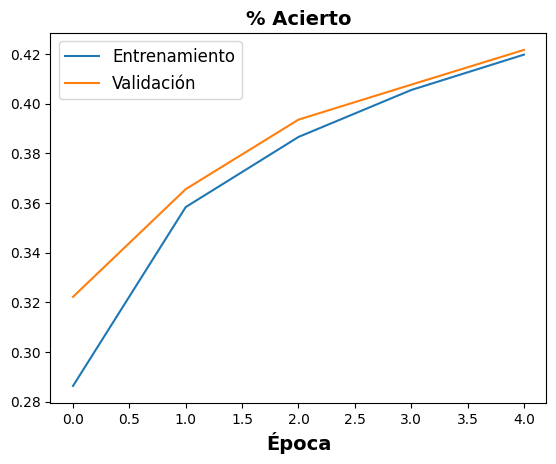

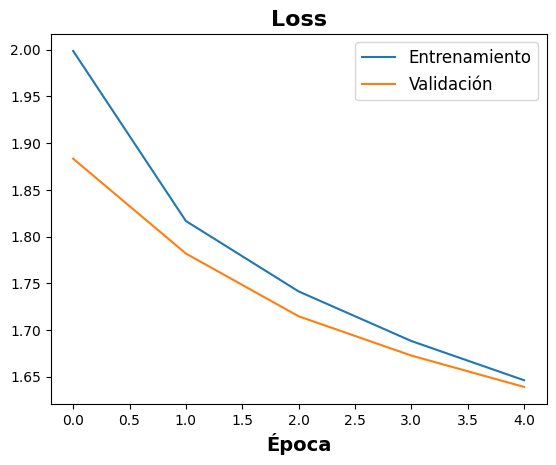

In [ ]:
# Gráfica para el % de acierto
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('% Acierto', fontsize=14, fontweight="bold")
plt.xlabel('Época', fontsize=14, fontweight="bold")
plt.legend(fontsize=12)  # Agrega la leyenda
plt.show()

# Gráfica para la pérdida
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Loss', fontsize=16, fontweight="bold")
plt.xlabel('Época', fontsize=14, fontweight="bold")
plt.legend(fontsize=12)  # Agrega la leyenda
plt.show()

---
#Experimento  N°1

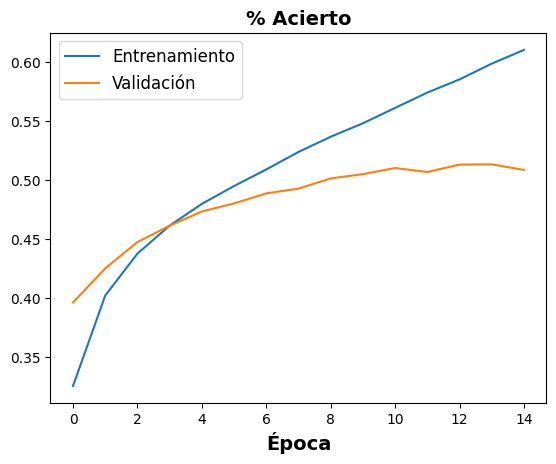

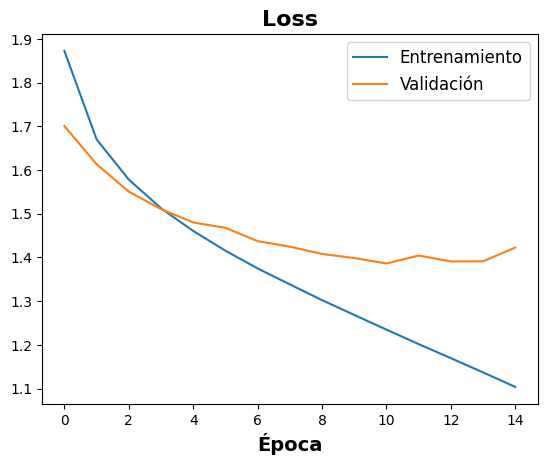

In [ ]:
# Gráfica para el % de acierto
plt.plot(history_1.history['accuracy'], label='Entrenamiento')
plt.plot(history_1.history['val_accuracy'], label='Validación')
plt.title('% Acierto', fontsize=14, fontweight="bold")
plt.xlabel('Época', fontsize=14, fontweight="bold")
plt.legend(fontsize=12)  # Agrega la leyenda
plt.show()

# Gráfica para la pérdida
plt.plot(history_1.history['loss'], label='Entrenamiento')
plt.plot(history_1.history['val_loss'], label='Validación')
plt.title('Loss', fontsize=16, fontweight="bold")
plt.xlabel('Época', fontsize=14, fontweight="bold")
plt.legend(fontsize=12)  # Agrega la leyenda
plt.show()

---
#Experimento  N°2

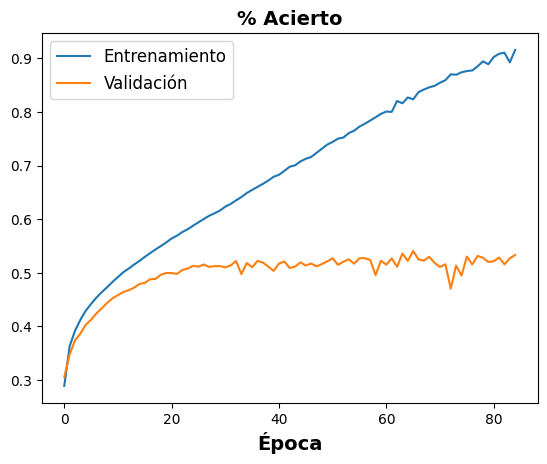

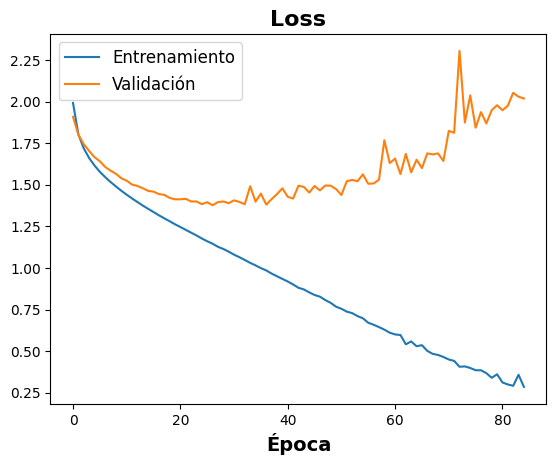

In [ ]:
# Gráfica para el % de acierto
plt.plot(history_2.history['accuracy'], label='Entrenamiento')
plt.plot(history_2.history['val_accuracy'], label='Validación')
plt.title('% Acierto', fontsize=14, fontweight="bold")
plt.xlabel('Época', fontsize=14, fontweight="bold")
plt.legend(fontsize=12)  # Agrega la leyenda
plt.show()

# Gráfica para la pérdida
plt.plot(history_2.history['loss'], label='Entrenamiento')
plt.plot(history_2.history['val_loss'], label='Validación')
plt.title('Loss', fontsize=16, fontweight="bold")
plt.xlabel('Época', fontsize=14, fontweight="bold")
plt.legend(fontsize=12)  # Agrega la leyenda
plt.show()



---


## Discusiones



---



### ¿Existe sobreajuste? (responder 0,2 puntos y argumentar 0,8 puntos)

+ Sí, se evidencia cierto grado de sobreajuste en la red. Esto se puede observar al comparar el desempeño entre los datos de entrenamiento y prueba. La red alcanza una mayor precisión en el conjunto de entrenamiento que en el de prueba, lo que indica que el modelo aprendió patrones específicos de los datos de entrenamiento que no generalizan completamente al conjunto de prueba.

### ¿Qué tan bien funciona una red feedforward con imágenes? - 0,2 puntos

+ Las redes neuronales feedforward pueden utilizarse para clasificación de imágenes. Sin embargo, su rendimiento es limitado debido a su incapacidad para capturar relaciones espaciales y patrones jerárquicos en los datos, lo que resulta en una precisión moderada (~50-60%) en comparación con arquitecturas más especializadas, como las redes neuronales convolucionales (CNN), que superan el 90% de precisión en tareas similares. Además, las redes feedforward no escalan eficientemente con imágenes de alta resolución y son sensibles a variaciones como traslaciones o rotaciones. Por lo tanto, aunque son útiles para prototipado rápido o problemas simples, se recomienda el uso de CNN u otros modelos avanzados para lograr un rendimiento óptimo en tareas de visión por computadora.

### Limitaciones encontradas en el desarrollo del trabajo (indicar 3) - 0,6 puntos

+ La principal limitación al momento de desarrollar el trabajo fue el tiempo de demora que requiere cada compilación de código.
+ Además de presentar una RAM limitada (12.7GB) la cual nos produjo ciertos incombenientes al momento de realizar el trabajo.
+ Pérdida de información espacial al convertir las imágenes en vectores unidimensionales, se pierde la disposición espacial de los píxeles, lo que limita la capacidad del modelo para identificar patrones visuales complejos.
+ Capacidad limitada del modelo, ya que, al no utilizar capas convolucionales ni técnicas avanzadas, la red no puede competir con arquitecturas más modernas en tareas de visión por computador.
+ Falta de optimización del entrenamiento: Se utilizó el optimizador SGD básico, sin ajustes adaptativos ni estrategias de mejora del aprendizaje, lo que posiblemente afectó la velocidad de convergencia y el rendimiento final.

---

## Penalizaciones
+ Ausencia de datos de autores - 10% de la calificación final
+ Falta de aplicación de buenas prácticas - 10% de la calificación final
+ Faltas en redacción y ortografía - 10% de la calificación final
+ Incumplimiento de rendimiento exigido - 50% de la calificación final

---